In [9]:
from fastai.text import *
import pandas as pd

data = TextLMDataBunch.from_csv("", "text.csv", delimiter='\t', text_cols="text", bs=50)
data.save("data_export.pkl")

In [12]:
data.show_batch()

idx,text
0,"a moment with the xxmaj cut to share her thoughts on office style . xxmaj surprisingly , she was pretty ambivalent on the topic . \n xxbos xxup el xxup paso , xxup tx — xxmaj native xxmaj texan and chili chef xxmaj jerry xxmaj gerber , 41 , said he has been suffering a palpable sense of melancholy ever since the 17th xxmaj annual xxmaj five - xxmaj"
1,relieved of their front - line duty and rotated to rear areas . xxmaj in many locations there would be near - constant bombardment from the enemy artillery . xxmaj snipers were omnipresent . xxmaj many a new man on the front line also learned the hard way that snipers were ready at all times to punish those foolhardy enough to peer carelessly above the xxunk . xxmaj then there
2,"schools , etc . xxmaj we need to dismantle racism with concrete actions . xxmaj taking down the statues is one small step . xxmaj dismantling the systems and policies that directly and indirectly oppress people of color requires even bolder actions . xxmaj the world is changing . xxmaj there are those who would have us go backwards , but our ingenuity as a nation compels us to move"
3,"of xxmaj libya has descended into conflict . xxmaj the xxmaj obama administration has already been slowly targeting xxup isis in xxmaj libya . xxmaj last xxmaj november , the xxmaj pentagon said an xxmaj american military airstrike killed the group 's former leader there . xxmaj recently , xxup u.s. and xxmaj british special operations teams have run more frequent missions into xxmaj libya to learn more about"
4,"their pants . xxmaj if you 've gained a few pounds , okay , cool . xxmaj well , not cool , but you know , life happens . xxmaj what is n't cool is how your size 12 butt squeezes in your size 8 jeans . xxmaj sure , you might get it all in there , but that "" more of you to love "" has to go"


In [11]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.320820,4.015022,0.306862,8:45:24


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


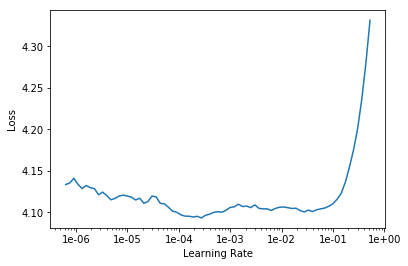

In [14]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [17]:
learn.save("learn1")
for x in range(3):
    print(learn.predict("The United States has promised to", n_words=30))

The United States has promised to “ track people on the road , ” Ron Canny came on track to huffpost in an address to Donald Trump in 2008 and in
The United States has promised to prove the United States never had access to the marley material . When President Donald Trump picked up this to the Supreme
The United States has promised to contact Title IX to congratulate my first babies preventable , and make Laugh to Agenda difficult for them . Now , the child housing and


In [18]:
learn.save("learn1")
learn.save_encoder("learn1_enc")